#Introduction

Paul Perryman - Logistic Regression 



#Imported Libraries





In [ ]:
#Import libraries and connect to google drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import model specific resources or libraries
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
nltk.download('stopwords')
import seaborn as sns
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#The basepath is the same as what it is in the class assignments for simplicity
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

##Data files used, and how the files are structured

The Dataset used for this Machine Learning Model is a Kaggle Dataset consisting of Fake and Real news articles, formatted in 'csv' files. 

The link to the dataset is: https://www.kaggle.com/c/fake-news/data?select=test.csv

As shown above, during the making of this Notebook the train and test csv files where loaded into the base path directory that was usued for all class assignment. This was done for consistancy with the class and for simplicity.

In [ ]:
# Data file name variables
train = basePath + "train.csv"
test = basePath + "test.csv"

The CSV files come foramtted with 5 total columns. The columns are 'id', 'title', 'author', 'text', and 'label'. 

    ID: The designation number of the article in the file
    Title: Title of the associated news article
    Author: Person who wrote the News article
    Text: All words of the news article 
    Label: Designation of whether the news article is reliable or unreliable. O means unreliable, 1 means reliable. (These essentially refer to Fake or Real)

'Train.csv' has 20799 rows in it by default. 'Test.csv' has 25999 rows in it by default.

##Reading the Data




In [ ]:
dataset = pd.read_csv(train)
dataset.shape

(20800, 5)

In [ ]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#Checking the dataset to make sure it is valid for usage

The dataset that will be used has 2 columns of "text" and "label". There are about 20762 total rows in the dataset, with about a 50:50 percent split between Fake and Real articles in the set. These statistics are shown below. 

1: Unreliable
0: Reliable
Distribution of labels:
1    10413
0    10387
Name: label, dtype: int64


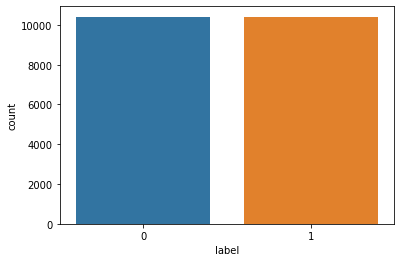

In [ ]:
#graph the total number of fake and real articles in the final dataset
sns.countplot(x="label", data=dataset);
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(dataset.label.value_counts());

##Data Cleaning and Preprocessing

In order to use data of the files, it has to be prepared and formatted in a certain manner. This invovles scrubbing the id, title, and author columns from the both datasets. Also, any rows with NAN values need to be removed entirely as they are unsuitable. 

In [ ]:
#missing values in the dataset
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# replacing the null values with empty string
dataset = dataset.fillna('')

In [ ]:
# merging the author name and news title
dataset['content'] = dataset['author']+' '+ dataset['title']

In [ ]:
# separating the data & label
X = dataset.drop(columns='label', axis=1)
Y = dataset['label']

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
dataset['content'] = dataset['content'].apply(stemming)

In [ ]:
#separating the data and label
X = dataset['content'].values
Y = dataset['label'].values

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

##Supervised Machine Learning 
The next cell shows a helpful function to display the results of the machine learning in a discenrable manner, taken from this source.



In [ ]:
#A helpful function pulled from a website (credited at the end of this Notebook) that will print out the results of the Models processing in a concise and understandable manner.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix for Logistic Regression algorithm',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')

#Split the dataset into testing and training
The next cell shows the dataset being partitioned into training, and testing sets ( 80% for training, 20% for testing ) that will be used for the Model.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

# Training Model

The model used will be Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

#Model Evaluation

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9850961538461539


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9743589743589743


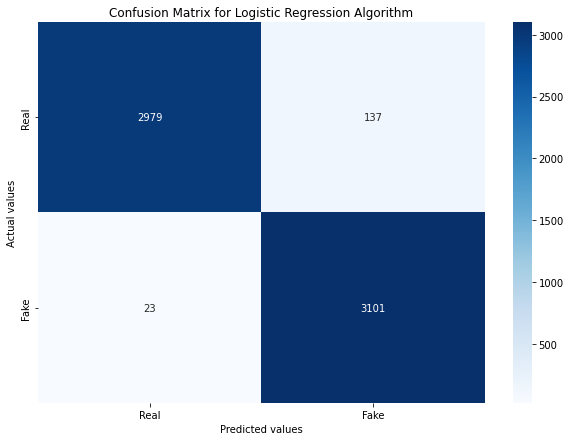

Accuracy: 0.9743589743589743


In [ ]:
#Print results of Logistic Regression algorithm in Confusion Matrix
lr_cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, fmt='g', cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()
print("Accuracy:", test_data_accuracy)

Sources and References used:

https://www.kaggle.com/c/fake-news/data?select=test.csv

https://medium.com/analytics-vidhya/fake-news-detection-using-natural-language-processing-ae4d9aaab923

https://www.thepythoncode.com/article/fake-news-classification-in-python#solution

https://www.analyticsvidhya.com/blog/2021/07/detecting-fake-news-with-natural-language-processing/

https://www.kaggle.com/code/jihenbelhoudi/fake-news-classification-using-logistic-regression/notebook